In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [2]:
dataset = pd.read_csv('C:/Users/abern/OneDrive/CIND820/baseball.csv')
dataset.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [4]:
dataset.describe(include = 'O')

,Team,League
count,1232,1232
unique,39,2
top,STL,AL
freq,47,616


In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en = dataset.iloc[:,0].values

In [6]:
X_en =labelencoder.fit_transform(X_en)
X_en

array([ 1,  2,  3, ..., 31, 32, 37])

In [7]:
X = dataset
X['Team'] = X_en
y = dataset.iloc[:,0].values

In [8]:
full_data = X.copy()
full_data['Team'] = y
full_data

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [9]:
X_e = full_data.iloc[:,1].values

In [10]:
X_e = labelencoder.fit_transform(X_e)
X_e

array([1, 1, 0, ..., 1, 1, 0])

In [11]:
Y = full_data
Y['League'] = X_e

In [12]:
full_data2 = Y.copy()
full_data2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [13]:
full_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   int32  
 1   League        1232 non-null   int32  
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int32(2), int64(6)
memory usage: 134.9 KB


In [16]:
full_data2[['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG']] = full_data2[['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG']].fillna(0)
full_data2

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,1,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2,1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,3,0,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,4,0,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,6,1,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,26,1,1962,705,759,81,0.330,0.390,0.260,0,0.0,0.0,161,0.000,0.000
1228,27,1,1962,706,626,93,0.321,0.394,0.268,0,0.0,0.0,161,0.000,0.000
1229,31,1,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,0.000,0.000
1230,32,1,1962,774,664,84,0.335,0.394,0.271,0,0.0,0.0,163,0.000,0.000


In [20]:
importances = full_data2.drop('Playoffs', axis = 1).apply(lambda x: x.corr(full_data2.Playoffs))
indices = np.argsort(importances)
print(importances[indices])

RA             -2.614768e-01
Team           -3.757032e-03
League         -2.261189e-19
G               2.220776e-02
OSLG            1.135084e-01
OOBP            1.162321e-01
Year            1.457787e-01
BA              2.902170e-01
SLG             3.247127e-01
OBP             3.638902e-01
RS              3.866285e-01
W               6.167573e-01
RankSeason      8.497857e-01
RankPlayoffs    9.122019e-01
dtype: float64


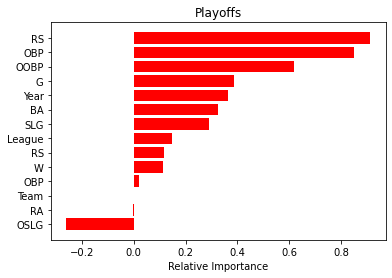

In [21]:
names = ['RA', 'Team', 'League', 'G', 'OSLG', 'OOBP', 'Year', 'BA', 'SLG', 'OBP', 'RS', 'OBP', 'RS', 'W', 'RankSeason', 'RankPlayoffs']
plt.title('Playoffs')
plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [22]:
for i in range(0, len(indices)):
    if np.abs(importances[i]) > 0.4:
        print(names[i])

OOBP
OBP
RS
